<div style="
    text-align: center;
    padding: 35px 20px;
    border-radius: 16px;
    background: linear-gradient(135deg, #fdf0ff, #f5ecff);
    color: #4b2c5e;
    font-family: Arial, sans-serif;
    margin-bottom: 25px;
">

  <h1 style="margin-bottom: 10px; color: #6a2dbf;">
    🎬 Movie Ratings & Popularity Analysis
  </h1>

  <p style="font-size: 15px; margin-bottom: 6px;">
    <strong>Author:</strong> Muhammad Abdullah
  </p>

  <p style="font-size: 14px; margin-bottom: 18px; color: #7a5c9e;">
    📅 <strong>Date:</strong> January 2026
  </p>

  <p style="font-size: 16px; max-width: 900px; margin: 0 auto 18px;">
    This notebook explores a movie dataset to understand <strong>rating patterns, audience engagement,
    and popularity trends</strong> using exploratory data analysis (EDA).
  </p>

</div>


### 🔍 Key Questions Explored

1. How many movies are there in the dataset?
2. What is the average `averageRating` across all movies?
3. Which movie has the highest rating, and what is its rating?
4. Which movie has the lowest rating, and what is its rating?
5. Which movie has received the most votes, and how many votes?
6. Which movie has received the fewest votes, and how many votes?
7. What is the correlation between `averageRating` and `numVotes`?
8. What are the top 5 movies by number of votes and their ratings?
9. What are the top 5 movies by rating and their number of votes?
10. How many movies have an `averageRating` above 6.0 and `numVotes` above 1,000?


# Step 1: Basic Setup & Data Loading

## 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

## 1.2 Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/imdb-ratings/imdb_ratings.csv")
df.head()

,Unnamed: 0,titleId,title,averageRating,numVotes
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,Le clown et ses chiens,6.1,208
2,2,tt0000003,Pauvre Pierrot,6.5,1404
3,3,tt0000004,Un bon bock,6.2,123
4,4,tt0000005,Blacksmith Scene,6.2,2200


## 1.3 Initial Data Inspection¶
Check column names, data types, and sample values.

In [3]:
# View column names, non-null counts, and data types
print(df.info())

# See a random sample of 5 rows
print(df.sample(5))

# Get the exact dimensions (rows, columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67408 entries, 0 to 67407
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     67408 non-null  int64  
 1   titleId        67408 non-null  object 
 2   title          67408 non-null  object 
 3   averageRating  67408 non-null  float64
 4   numVotes       67408 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB
None
       Unnamed: 0     titleId                                 title  \
20734       20734   tt0091206            Hirtettyjen kettujen metsä   
66133       66134   tt9691336                                 Jaanu   
32792       32792  tt10779344  Jonas Brothers Happiness Begins Tour   
51316       51317   tt7762568                 Eric: A Tale of Thorn   
29278       29278  tt10174244                                 Afsos   

       averageRating  numVotes  
20734            6.8        51  
66133            6.9    

# Step 2: Data Exploration
## 2.1 Check Null Values
Identify missing values in the dataset.

In [4]:
df.isnull().sum()

Unnamed: 0       0
titleId          0
title            0
averageRating    0
numVotes         0
dtype: int64

## 2.2 Check Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

## 2.3 Summary Statistics
Get basic statistics for numerical columns.

In [6]:
# Statistics for numerical columns
df.describe()

,Unnamed: 0,averageRating,numVotes
count,67408.000000,67408.000000,6.740800e+04
mean,33703.868947,6.354568,2.408154e+03
std,19459.561080,1.351718,2.320630e+04
min,0.000000,1.000000,5.000000e+00
25%,16851.750000,5.600000,1.800000e+01
50%,33703.500000,6.500000,7.500000e+01
75%,50556.250000,7.300000,3.680000e+02
max,67408.000000,10.000000,1.515727e+06


In [7]:
# Statistics for categorical (text) columns
df.describe(include='O')

,titleId,title
count,67408,67408
unique,67391,64970
top,tt9747440,Pilot
freq,2,28


# Step 3: Data Cleaning & Preprocessing
## 3.1 Validate Data Types
Confirm numerical and categorical columns are correctly formatted.



In [8]:
df.dtypes

Unnamed: 0         int64
titleId           object
title             object
averageRating    float64
numVotes           int64
dtype: object

## 3.2 Remove duplicate data

In [9]:
# Get only the duplicated titleIds as a list
duplicate_title_ids = df[df.duplicated('titleId', keep=False)]['titleId'].unique().tolist()

print(duplicate_title_ids)


['tt0046511', 'tt0047336', 'tt0051082', 'tt0084222', 'tt0088163', 'tt0088496', 'tt1135961', 'tt1173941', 'tt1226736', 'tt1288367', 'tt7418012', 'tt7734738', 'tt8106596', 'tt8337320', 'tt8707008', 'tt9145372', 'tt9747440']


In [10]:
duplicate_df = df[df['titleId'].isin(duplicate_title_ids)]
clean_df = df.drop_duplicates(subset='titleId', keep='first')

## Step 4: QUESTION ANSWERING

## Q1: How many movies are there in the dataset?

In [11]:
len(clean_df)

67391

Dataset contains 67408

Q2: What is the average averageRating across all movies?

Average rating for movies 6.354567707097082


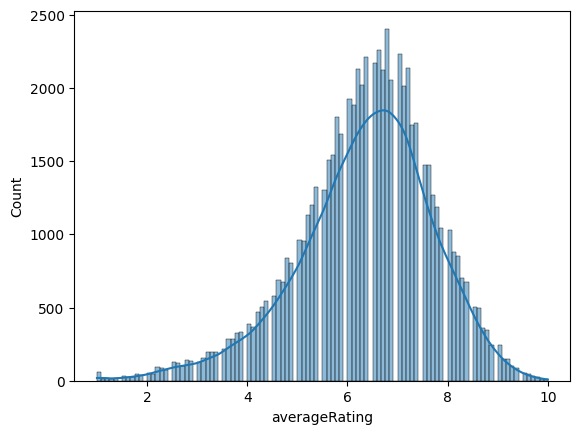

In [12]:
sns.histplot(x='averageRating', data=clean_df, kde=True)
print(f"Average rating for movies {df['averageRating'].mean()}")


## Q3: Which movie has the highest rating, and what is its rating?


In [13]:
clean_df[clean_df['averageRating']==10]

,Unnamed: 0,titleId,title,averageRating,numVotes
30328,30328,tt10407660,Kim Hushable,10.0,6
32748,32748,tt10773030,Aesop's Fables,10.0,7
34771,34771,tt11191356,Dear Future Children,10.0,25
36347,36347,tt11460966,"Ines Pedretti contro i sensi vietati, le strad...",10.0,8
38513,38513,tt11809482,Sadika: l'Artiste Multidimensionnelle,10.0,7
38565,38565,tt1181817,God's Will: The Sex Factor,10.0,5
39208,39208,tt11926728,Days of Géants,10.0,163
41631,41631,tt12545522,Cityscapes,10.0,17
42151,42151,tt12728950,The Wake-Up Call with Pritan Ambroase,10.0,723
42990,42991,tt12949176,Starving,10.0,5


## Q4: Which movie has the lowest rating, and what is its rating?

In [14]:
print(f"Lowest rating of a movie ever in dataset {clean_df['averageRating'].min()}")

Lowest rating of a movie ever in dataset 1.0


In [15]:
clean_df[clean_df['averageRating']==1]

,Unnamed: 0,titleId,title,averageRating,numVotes
1783,1783,tt0010319,The Jungle Trail,1.0,8
1803,1803,tt0010432,A Man's Fight,1.0,13
1903,1903,tt0010949,The Adventurer,1.0,10
2306,2306,tt0012746,Terror Trail,1.0,12
27977,27977,tt10028766,Nationalmuseum - ljuset återvänder,1.0,5
28681,28681,tt1010470,XXV por detrás me gusta más,1.0,8
29164,29164,tt10161034,false friends,1.0,5
31034,31034,tt10510594,Uppskruvat,1.0,5
31962,31962,tt10692556,Bringing Fallen To Life,1.0,5
32019,32019,tt10701592,Händelse på sjukhus,1.0,5


## Q5: Which movie has received the most votes, and how many votes?

In [16]:
# highest vote
clean_df['numVotes'].max()

1515727

In [17]:
clean_df[clean_df['numVotes']==1515727]

,Unnamed: 0,titleId,title,averageRating,numVotes
44770,44771,tt1345836,The Dark Knight Rises,8.4,1515727


## Q6: Which movie has received the fewest votes, and how many votes?


In [18]:
# FEWEST vote
clean_df['numVotes'].min()

5

In [19]:
movies_wit_fewest_votes = clean_df[clean_df['numVotes']==5].sort_values(by='averageRating')
movies_wit_fewest_votes.head()

,Unnamed: 0,titleId,title,averageRating,numVotes
46017,46018,tt7123950,Janne the Movie,1.0,5
44226,44227,tt13235552,Onethousandfivehundred,1.0,5
52741,52742,tt7925796,A visit inside the reservoir,1.0,5
42413,42413,tt12804710,Rena rama Rolf - En plats i solen,1.0,5
39704,39704,tt12078950,Batalon,1.0,5


## Q7: What is the correlation between averageRating and numVotes?
(Checks if popularity affects rating or vice versa)

In [20]:
clean_df[['averageRating', 'numVotes']].corr()


,averageRating,numVotes
averageRating,1.00000,0.06343
numVotes,0.06343,1.00000


In [21]:
df['averageRating'].corr(df['numVotes'], method='spearman')


np.float64(0.029487671640511855)

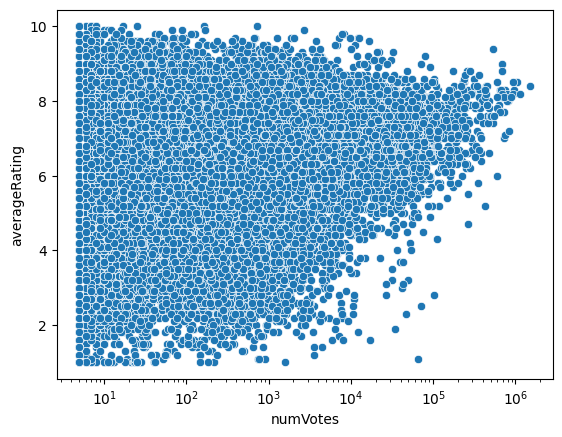

In [22]:
sns.scatterplot(data=clean_df, x='numVotes', y='averageRating')
plt.xscale('log')  # very important for votes
plt.show()


The Spearman correlation between averageRating and numVotes is 0.03, indicating a negligible relationship. This suggests that higher popularity does not correspond to higher (or lower) ratings

## Q8: List the top 5 movies by number of votes and their ratings.
(Shows the most discussed / popular movies)



In [23]:
top_5_movies = (
    df[['title', 'averageRating', 'numVotes']]
    .sort_values(by='numVotes', ascending=False)
    .head(5)
)

top_5_movies


,title,averageRating,numVotes
44770,The Dark Knight Rises,8.4,1515727
35182,Shutter Island,8.2,1129155
18956,Back to the Future,8.5,1057549
17122,Star Wars: Episode VI - Return of the Jedi,8.3,950081
46801,Joker,8.5,937904


## Q9: List the top 5 movies by rating and their number of votes.

In [24]:
top_5_movies = (
    df[['title', 'averageRating', 'numVotes']]
    .sort_values(by='averageRating', ascending=False)
    .head(5)
)

top_5_movies

,title,averageRating,numVotes
30328,Kim Hushable,10.0,6
38565,God's Will: The Sex Factor,10.0,5
38513,Sadika: l'Artiste Multidimensionnelle,10.0,7
34771,Dear Future Children,10.0,25
41631,Cityscapes,10.0,17


## Q10: How many movies have an averageRating above 6.0 and numVotes above 1,000?

In [25]:
count_movies = df[
    (df['averageRating'] > 6.0) & (df['numVotes'] > 1000)
].shape[0]

count_movies


7108

<hr>

<div style="
    text-align: center;
    padding: 30px 20px;
    border-radius: 14px;
    background: linear-gradient(135deg, #fbeaff, #f3e8ff);
    color: #4b2c5e;
    font-family: Arial, sans-serif;
">

  <h2 style="margin-bottom: 12px; color: #6a2dbf;">
    💜 Thank You for Reading 💖
  </h2>

  <p style="font-size: 16px; margin-bottom: 14px;">
    👍 <strong>If you found this analysis helpful, please consider giving it an upvote.</strong>
  </p>

  <p style="font-size: 15px; margin-bottom: 20px;">
    📝 Found an issue or have ideas for further exploration?<br>
    Feel free to share your <strong>feedback, suggestions, or improvements</strong>.
  </p>

  <div style="font-size: 18px; margin-top: 10px; color: #7b3fe4;">
    <span style="margin-right: 25px;">👍 <strong>Vote</strong></span>
    <span>✍️ <strong>Feedback</strong></span>
  </div>

  <p style="
      margin-top: 22px;
      font-size: 14px;
      color: #8a5ca8;
  ">
    Your support and feedback help improve the analysis 🌸
  </p>

</div>

